In [11]:
#import thư viện
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 

In [18]:
#lấy dữ liệu
df = pd.read_csv('ETH-USD-2 .csv')
#show dữ liệu
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2019,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
1,1/2/2019,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2,1/3/2019,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
3,1/4/2019,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
4,1/5/2019,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928
...,...,...,...,...,...,...,...
1546,3/27/2023,1775.481323,1781.379272,1690.516602,1715.460815,1715.460815,8585750760
1547,3/28/2023,1715.327393,1791.110962,1702.564697,1772.785645,1772.785645,8346890042
1548,3/29/2023,1772.899902,1825.600952,1772.899902,1793.001831,1793.001831,9136176952
1549,3/30/2023,1793.345947,1827.280273,1766.248901,1792.737183,1792.737183,9724496987


In [19]:
# đếm số dòng và cột của dữ liệu
df.shape

(1551, 7)

 Mục mới

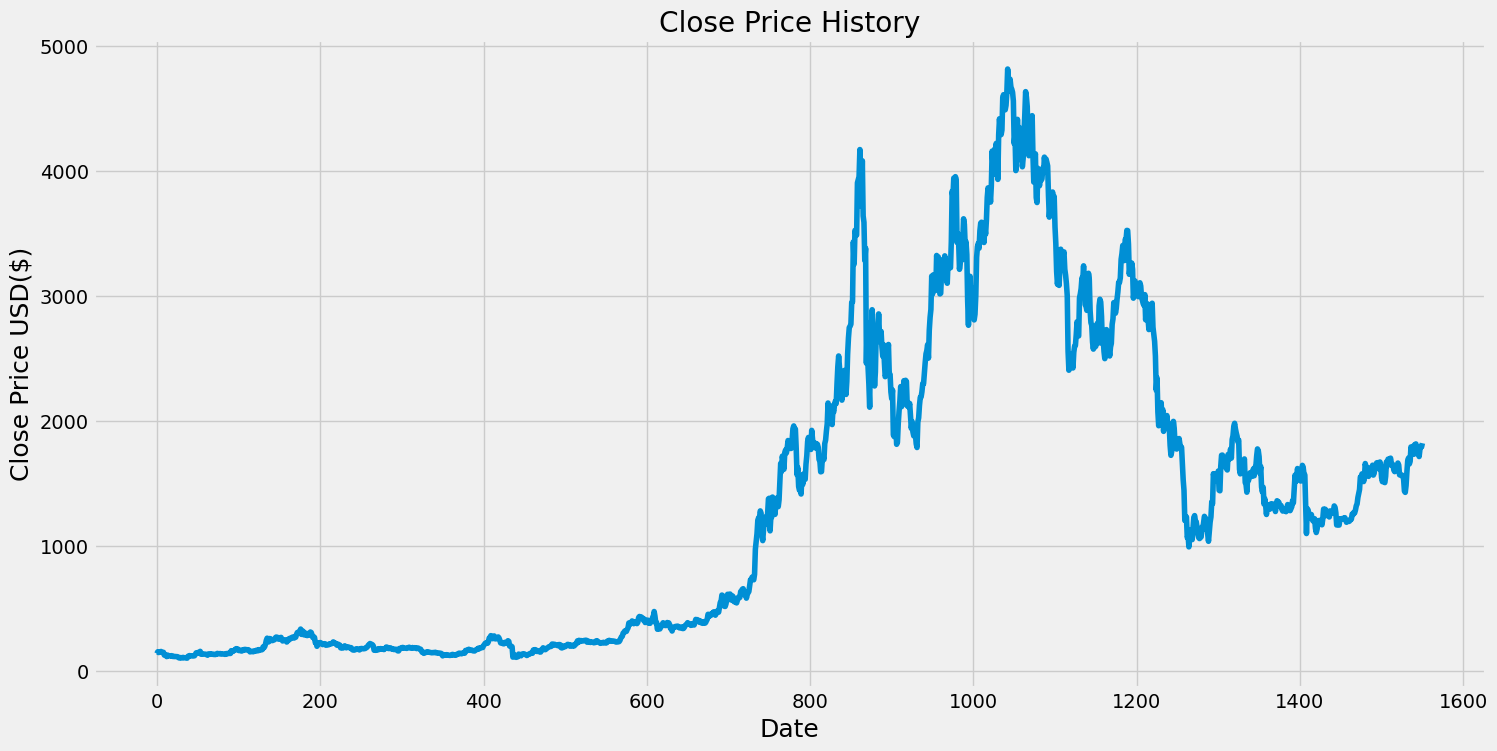

In [20]:
#Visualize dữ liệu 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [22]:
#Tạo dataframe mới với chỉ 1 cột là 'Close'
data = df.filter(['Close']
#Convert data to numpy array
dataset = data.values
#Lấy số hàng của data để train model
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1241

In [23]:
#Scale dữ liệu về khoảng [0,1]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00770764],
       [0.01073007],
       [0.00947408],
       ...,
       [0.35867187],
       [0.35861566],
       [0.36483649]])

In [29]:
#Tạo dữ liệu training
#Tạo dữ liệu scaled training datasets
train_data = scaled_data[0:training_data_len , :]
#Chia dữ liệu thành x_train và y_train 
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([7.70763875e-03, 1.07300741e-02, 9.47407656e-03, 1.06311386e-02,
       1.08555984e-02, 1.13033056e-02, 1.00187777e-02, 9.73421685e-03,
       9.82842335e-03, 5.11728420e-03, 4.88853304e-03, 4.55252083e-03,
       2.62610009e-03, 5.21150366e-03, 3.71688165e-03, 4.03856709e-03,
       4.07995888e-03, 3.49968745e-03, 4.24503406e-03, 3.17352409e-03,
       2.68134069e-03, 3.01903191e-03, 2.74395370e-03, 2.72489475e-03,
       2.51575357e-03, 2.53920461e-03, 1.88420389e-03, 4.36462934e-04,
       2.25788685e-04, 9.28771027e-04, 5.36523218e-04, 6.53096542e-04,
       1.25223447e-03, 6.28217582e-04, 6.98091265e-04, 6.17777337e-04,
       8.15685077e-05, 0.00000000e+00, 3.12953414e-03, 3.16418888e-03,
       4.30609934e-03, 3.56089357e-03, 3.83150045e-03, 3.82753130e-03,
       3.58039670e-03, 3.73125706e-03, 3.97763309e-03, 6.17381930e-03,
       8.82902007e-03, 8.66923809e-03, 9.56315194e-03, 8.83591771e-03,
       9.46503640e-03, 1.15261866e-02, 6.65257852e-03, 7.49594678e-03,
     

In [32]:
#Convert x_train và y_train về dạng numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
#Reshape lại data, LSTM mong đợi 1 mảng 3 chiều [số lượng mẫu số, số bước thời gian, số feature]
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1181, 60, 1)

In [37]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [38]:
#Compile the model 
#Thêm trình tối ưu háo và hàm mất mát
model.compile(optimizer='adam',loss='mean_squared_error')

In [57]:
#Training the model
model.fit (x_train,y_train,batch_size=4,epochs=5)

Epoch 1/5
296/296 [==============================] - 17s 57ms/step - loss: 0.0010
Epoch 2/5
296/296 [==============================] - 17s 57ms/step - loss: 8.3656e-04
Epoch 3/5
296/296 [==============================] - 17s 58ms/step - loss: 8.1744e-04
Epoch 4/5
296/296 [==============================] - 16s 55ms/step - loss: 7.4960e-04
Epoch 5/5
296/296 [==============================] - 17s 56ms/step - loss: 6.6435e-04


In [58]:
#Tạo testing data
test_data = scaled_data[training_data_len-60:,:]
# tạo x_test và y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [59]:
#Conver data Thành npArray
x_test = np.array(x_test)

In [60]:
#Reshape data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [61]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 0s 19ms/step


In [62]:
#Tinh toán RMSE(Root mean squared error)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

30.204445504763104

<ipython-input-63-2209286af82e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


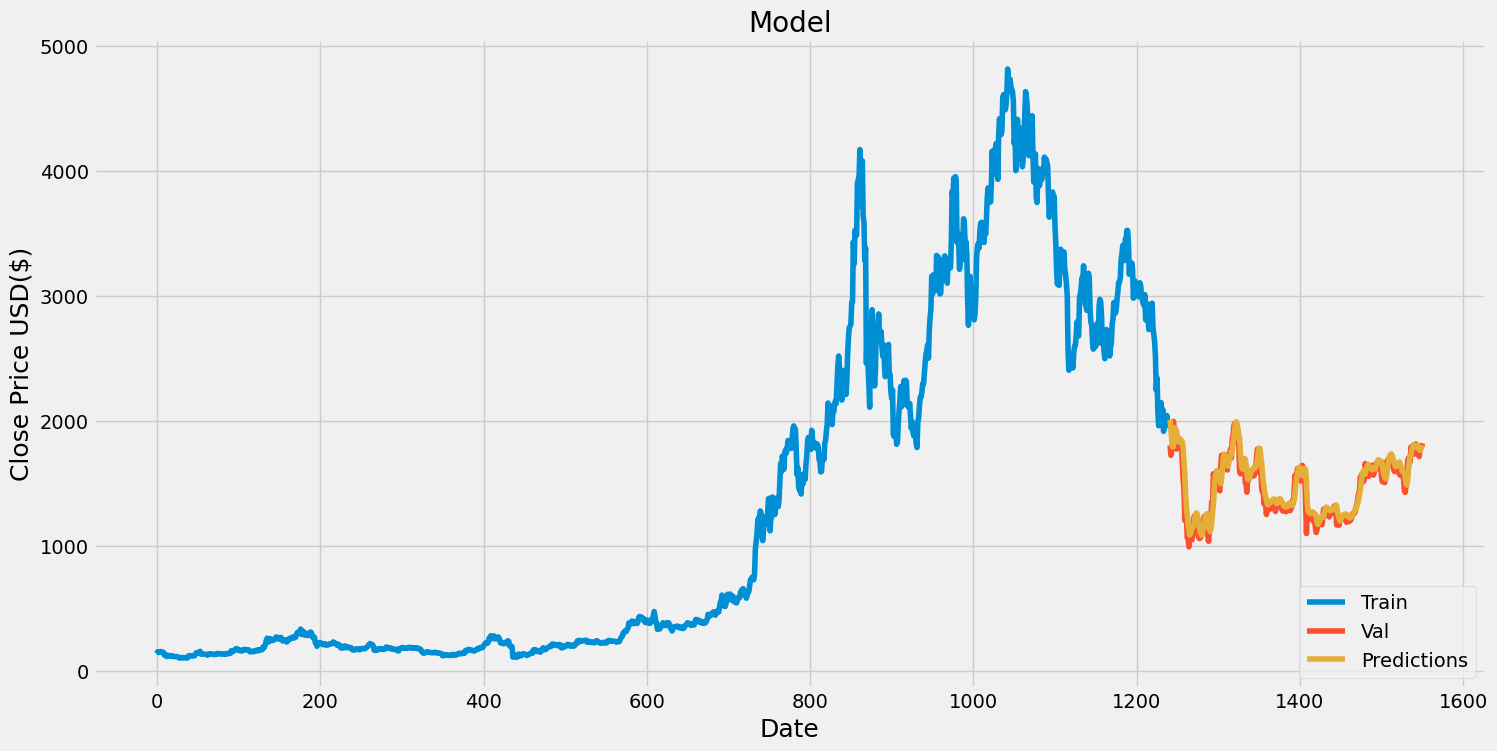

In [63]:
#Plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [64]:
#Show valid and predictions
valid

,Close,Predictions
1241,1803.913330,2009.127563
1242,1724.922852,1937.094116
1243,1757.941772,1845.792969
1244,1812.031006,1793.638672
1245,1996.441284,1792.497070
...,...,...
1546,1715.460815,1781.828979
1547,1772.785645,1765.001465
1548,1793.001831,1770.840210
1549,1792.737183,1789.601440


In [66]:
# Dự đoán ngày tiếp theo
newdata = pd.read_csv('ETH-USD-2 .csv')
#Tạo dataframe mới
new_df = newdata.filter(['Close'])
#Lấy giá đóng cửa 30 ngày gần nhất
last_30_days = new_df[-60:].values
#Scale the data bw 0 n 1
last_30_days_scaled = scaler.transform(last_30_days)

X_test = []
X_test.append(last_30_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Dự đoán giá 
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 29ms/step
[[1828.4667]]
